## pandas_datareader

### The `pandas_datareader` Module

In previous parts of this chapter, we discussed APIs.  We use APIs to interface with data on a web server and bring that data in to Python.

In this section, we make use of the `pandas_datareader` module.  This is a module that provides a set of API features to Python in such a way that the data is directly loaded in to a `pandas` DataFrame format.  The `pandas_datareader` module actually used to be part of the `pandas` module, but it was spun off in to its own separate module.

In [1]:
import pandas_datareader.data as web

Let's start with an example provided in the module's [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fred).

In [72]:
from datetime import datetime

start = datetime(2005,1,1)
end = datetime(2019,12,31)
gdp = web.DataReader('GDP', 'fred', start, end)

gdp.head()

,GDP
DATE,
2005-01-01,12761.337
2005-04-01,12910.022
2005-07-01,13142.873
2005-10-01,13332.316
2006-01-01,13603.933


The above yields a data series of GDP values, listed at a quarterly frequency.  Note that the `DATE` listed in the above DataFrame is not a column of data, it contains the labels for the rows.  Remember, label names are bold-faced, so the name `2010-01-01` being in bold tells you that this is a row label, just like the name `GDP` in bold tells you that this is a column label.

Above, we accessed data from the `'fred'` data provider.  The FRED (Federal Reserve Economic Data) is an important provider of macroeconomic data, like measurement of gross domestic product.

Note that we can collect multiple data series from FRED simultaneously by requesting a list of data series in the first argument to the `DataReader()` function, as shown below.

In [73]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)

inflation.head()

,CPIAUCSL,CPILFESL
DATE,,
2005-01-01,191.6,199.0
2005-02-01,192.4,199.4
2005-03-01,193.1,200.1
2005-04-01,193.7,200.2
2005-05-01,193.6,200.5


We see two columns of data printed above, corresponding to the two data series names that were requested.  But how are these series names chosen?  The name `'CPIAUCSL'`, for instance, is not an intuitive name for "inflation."  And if `'CPIAUCSL'` and `'CPILFESL'` are both data about inflation, what makes them different?

If you search for a data series name on the [FRED website](https://fred.stlouisfed.org/), it will take you to the data series.  Thus, we can easily find that:
- [CPIAUCSL](https://fred.stlouisfed.org/series/CPIAUCSL) is the consumer price index for urban consumers
- [CPILFESL](https://fred.stlouisfed.org/series/CPILFESL) is the consumer price index for urban consumers, excluding food and energy costs

Data on FRED are organized by [category](https://fred.stlouisfed.org/categories),and [consumer price indexes](https://fred.stlouisfed.org/categories/9) are one such category.

In [74]:
alcohol = web.DataReader('CUSR0000SAF116', 'fred', start, end)

alcohol.head()

,CUSR0000SAF116
DATE,
2005-01-01,194.6
2005-02-01,195.0
2005-03-01,195.2
2005-04-01,195.5
2005-05-01,195.3


Price indexes are interesting, but let's focus on some financial time series.

In [75]:
data_list = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30']

ts = web.DataReader(data_list, 'fred', start, end)

ts.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30
DATE,,,,,,,,,
2005-01-03,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85
2005-01-04,2.05,2.33,2.63,2.82,3.20,3.72,4.02,4.29,4.91
2005-01-05,2.04,2.33,2.63,2.83,3.22,3.73,4.02,4.29,4.88
2005-01-06,2.04,2.31,2.63,2.82,3.18,3.71,4.01,4.29,4.89
2005-01-07,2.03,2.32,2.63,2.82,3.20,3.73,4.03,4.29,4.88


The data returned provides the term structure of interest rates.  Interest rates on treasuries of varying maturities are collected.

It's time to treat these row labels a bit more formally.

Recall that column labels can be accessed like so.

In [76]:
ts.columns

Index(['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10',
       'DGS30'],
      dtype='object')

The columns of a DataFrame are referred to as, quite intuitively, *columns*!

The row labels are a bit different, they are typically referred to as the *index* of the DataFrame.  The list of row labels is thus accessible via:

In [77]:
ts.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=3912, freq=None)

It is at this point that use of `.loc` becomes interesting and useful, rather than simply an academic point about the structure of DataFrames.  For instance, to look up the term structure of interest rates on June 7, 2019, we would enter:

In [78]:
ts.loc['2019-06-07']

DGS1MO    2.30
DGS3MO    2.28
DGS6MO    2.15
DGS1      1.97
DGS2      1.85
DGS5      1.85
DGS7      1.97
DGS10     2.09
DGS30     2.57
Name: 2019-06-07 00:00:00, dtype: float64

It's helpful to have an index because it lets us label the data in two dimensions at once.  The column label will tell us the name of the data series (e.g. `'DGS1'`, which is the yield on a set of 1 year constant maturity U.S. treasuries) and the row *index* will tell us the time at which that data is observed.

In earlier parts of this book, the row index was boring.  Unless explicitly given a list of row labels to use for the index, Python will assign the row index to be the row number.  For example:

In [79]:
import pandas as pd
import numpy as np
np.random.seed(0)
df = pd.DataFrame(columns=['x'])
df['x'] = np.random.normal(0,1,10)
df.head()

,x
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558


Note that the data returned from `pandas_datareader` is indexed in a very convenient way.  Along with using `ts.loc['2019-06-07']`, we can get slices of the data like so:

In [80]:
ts.loc['2019-01-04':'2019-01-09']

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30
DATE,,,,,,,,,
2019-01-04,2.40,2.42,2.51,2.57,2.50,2.49,2.56,2.67,2.98
2019-01-07,2.42,2.45,2.54,2.58,2.53,2.53,2.60,2.70,2.99
2019-01-08,2.40,2.46,2.54,2.60,2.58,2.58,2.63,2.73,3.00
2019-01-09,2.40,2.45,2.52,2.59,2.56,2.57,2.64,2.74,3.03


There are two important things to notice about index slicing here (*slicing* is another term for getting a subset of data).

First, the slice ends *at* the endpoint, not just before it.  This breaks from normal Python convention.  For instance, 0:10 will give you the numbers 0 through 9, not the numbers 0 through 10.  When slicing by index, the last row label you include is the last row you get.  As another example:

In [81]:
df.loc[1:2]

,x
1,0.400157
2,0.978738


Second, the data exists for Jan. 4 and Jan. 7-9, but not for Jan. 5-6.  Why?  Because Jan. 5-6 was a weekend.

We can shift date indexes around quite easily via `.shift()`.  This will come in handy in many applications.

In [82]:
ts.head(6)

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30
DATE,,,,,,,,,
2005-01-03,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85
2005-01-04,2.05,2.33,2.63,2.82,3.20,3.72,4.02,4.29,4.91
2005-01-05,2.04,2.33,2.63,2.83,3.22,3.73,4.02,4.29,4.88
2005-01-06,2.04,2.31,2.63,2.82,3.18,3.71,4.01,4.29,4.89
2005-01-07,2.03,2.32,2.63,2.82,3.20,3.73,4.03,4.29,4.88
2005-01-10,2.07,2.36,2.67,2.86,3.23,3.75,4.03,4.29,4.86


In [83]:
ts.shift(1).head(6)

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30
DATE,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85
2005-01-05,2.05,2.33,2.63,2.82,3.20,3.72,4.02,4.29,4.91
2005-01-06,2.04,2.33,2.63,2.83,3.22,3.73,4.02,4.29,4.88
2005-01-07,2.04,2.31,2.63,2.82,3.18,3.71,4.01,4.29,4.89
2005-01-10,2.03,2.32,2.63,2.82,3.20,3.73,4.03,4.29,4.88


Note that the shifting moves data based on the dates included in the dataset.  For instance, the interest rates on Friday, if we shift the data forward by one day, are moved to Monday and not to Saturday.

Shifting is incredibly useful for calculating things like growth rates.

In [84]:
ts['GDS30 growth'] = ts['DGS30'] / ts['DGS30'].shift(1) - 1

ts.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth
DATE,,,,,,,,,,
2005-01-03,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN
2005-01-04,2.05,2.33,2.63,2.82,3.20,3.72,4.02,4.29,4.91,0.012371
2005-01-05,2.04,2.33,2.63,2.83,3.22,3.73,4.02,4.29,4.88,-0.006110
2005-01-06,2.04,2.31,2.63,2.82,3.18,3.71,4.01,4.29,4.89,0.002049
2005-01-07,2.03,2.32,2.63,2.82,3.20,3.73,4.03,4.29,4.88,-0.002045


Beyond useful slicing and shifting tricks, using indexed data like this (i.e. data where the rows have an explicit label and not simply the default row label equals row number format) is great for plotting.

<AxesSubplot:xlabel='DATE'>

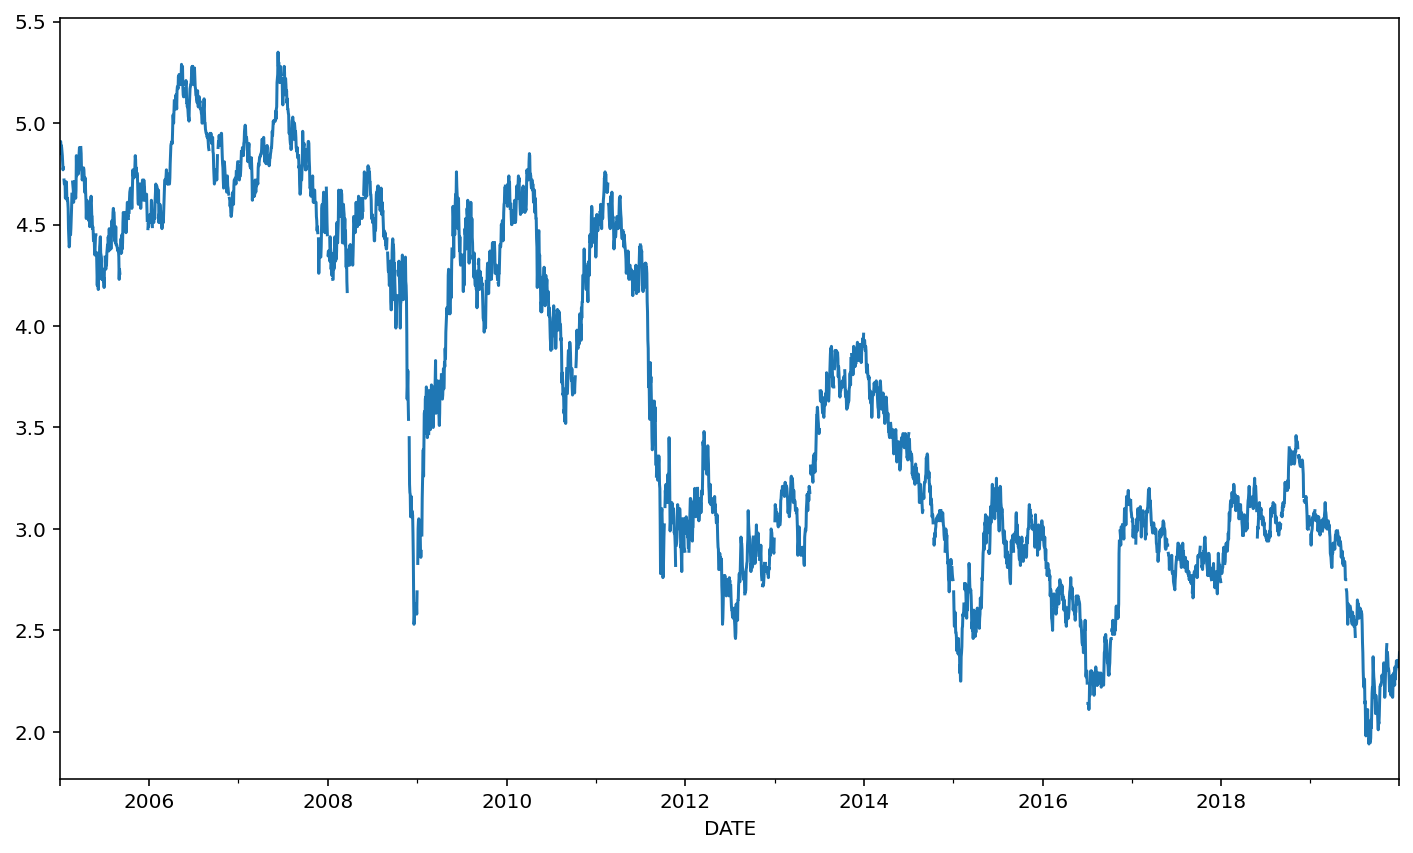

In [85]:
ts['DGS30'].plot()

Look at the x-axis!  It's automatically labeled for us.  Thanks, Python.

Let's now plot the Treasury yield curve for '2016-06-07'.  Recall that we can access the data like so:

In [86]:
ts.loc['2016-06-07', data_list]

DGS1MO    0.20
DGS3MO    0.28
DGS6MO    0.43
DGS1      0.59
DGS2      0.78
DGS5      1.23
DGS7      1.51
DGS10     1.72
DGS30     2.54
Name: 2016-06-07 00:00:00, dtype: float64

The maturity times for these securities are:

In [87]:
mat = [1, 3, 6, 12, 24, 60, 84, 120, 360]

We can then plot the yield curve using `seaborn`.

<AxesSubplot:ylabel='2016-06-07 00:00:00'>

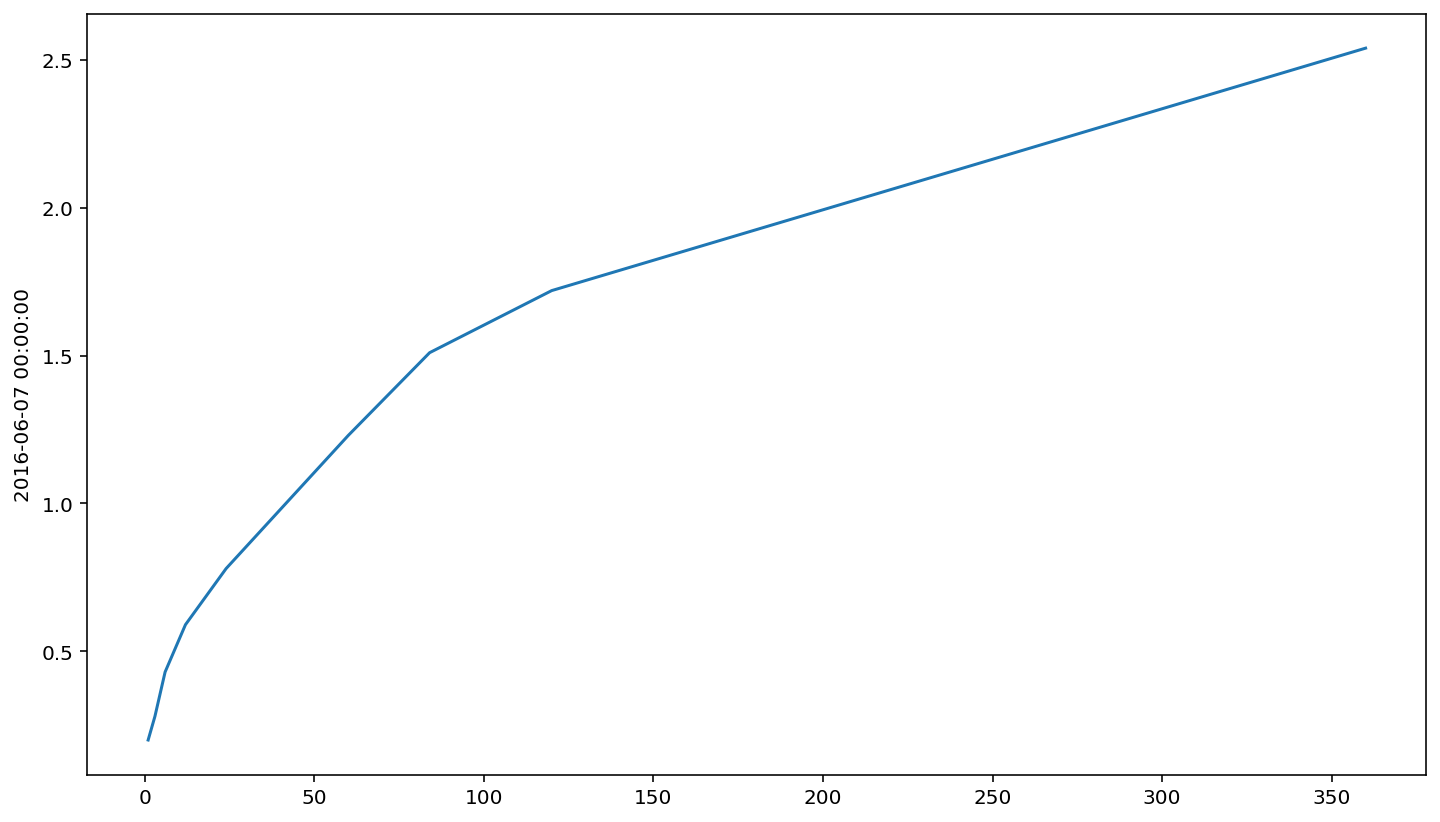

In [88]:
import seaborn as sns
sns.lineplot(x=mat, y=ts.loc['2016-06-07', data_list])

The yield curve does not always have this shape to it, though what's shown above is the "standard" appearance.  Typically, the yield curve is upward-sloping and somewhat curvy.

In contrast, the yield curve may sometimes invert.  That is, it will have places in the curve that are downward-sloping.

<AxesSubplot:ylabel='2007-01-02 00:00:00'>

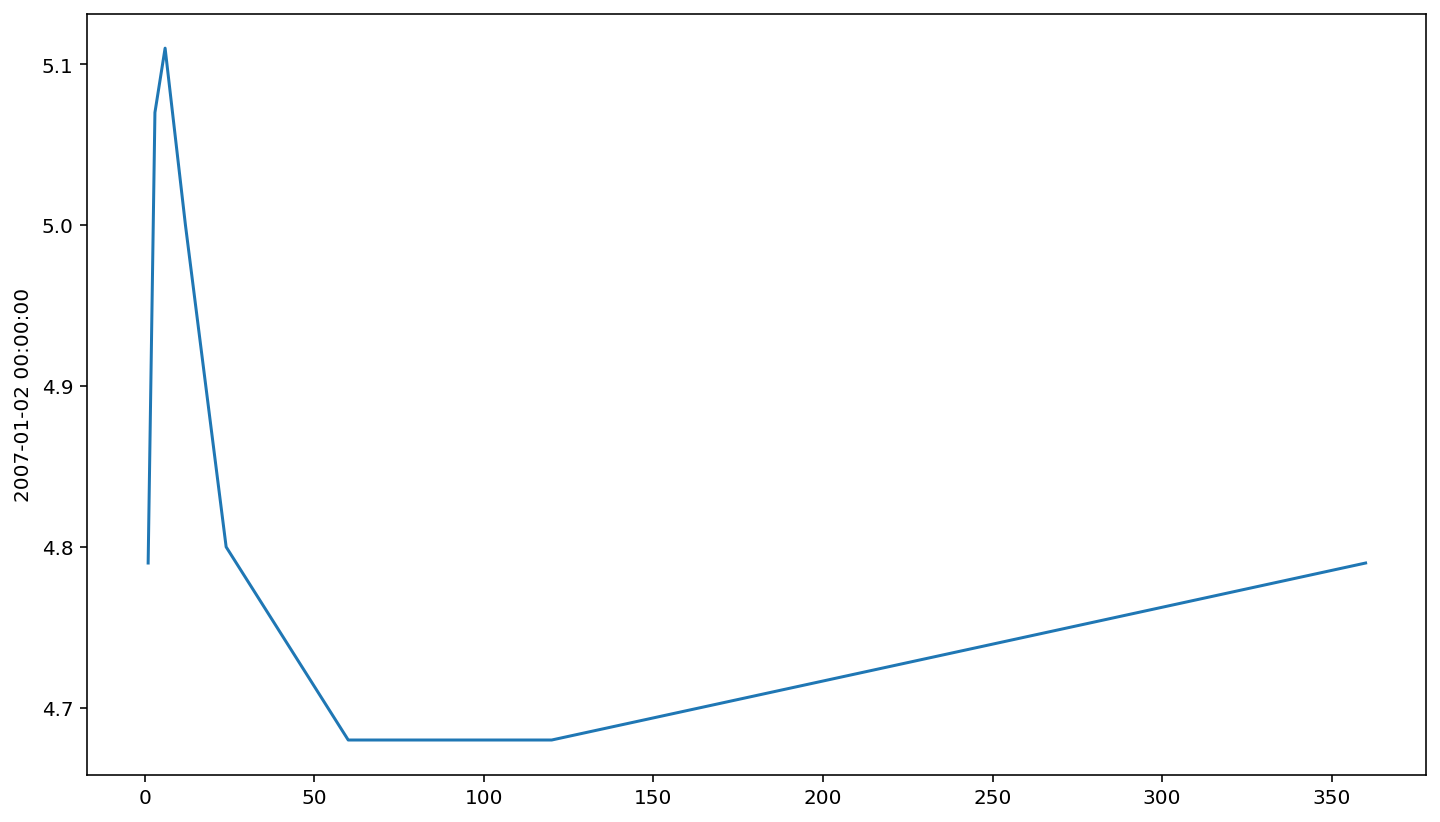

In [98]:
sns.lineplot(x=mat, y=ts.loc['2007-01-02', data_list])

The usual place where we look for this is in the 10-year Treasury minus the 2-year Treasury.

<AxesSubplot:xlabel='DATE'>

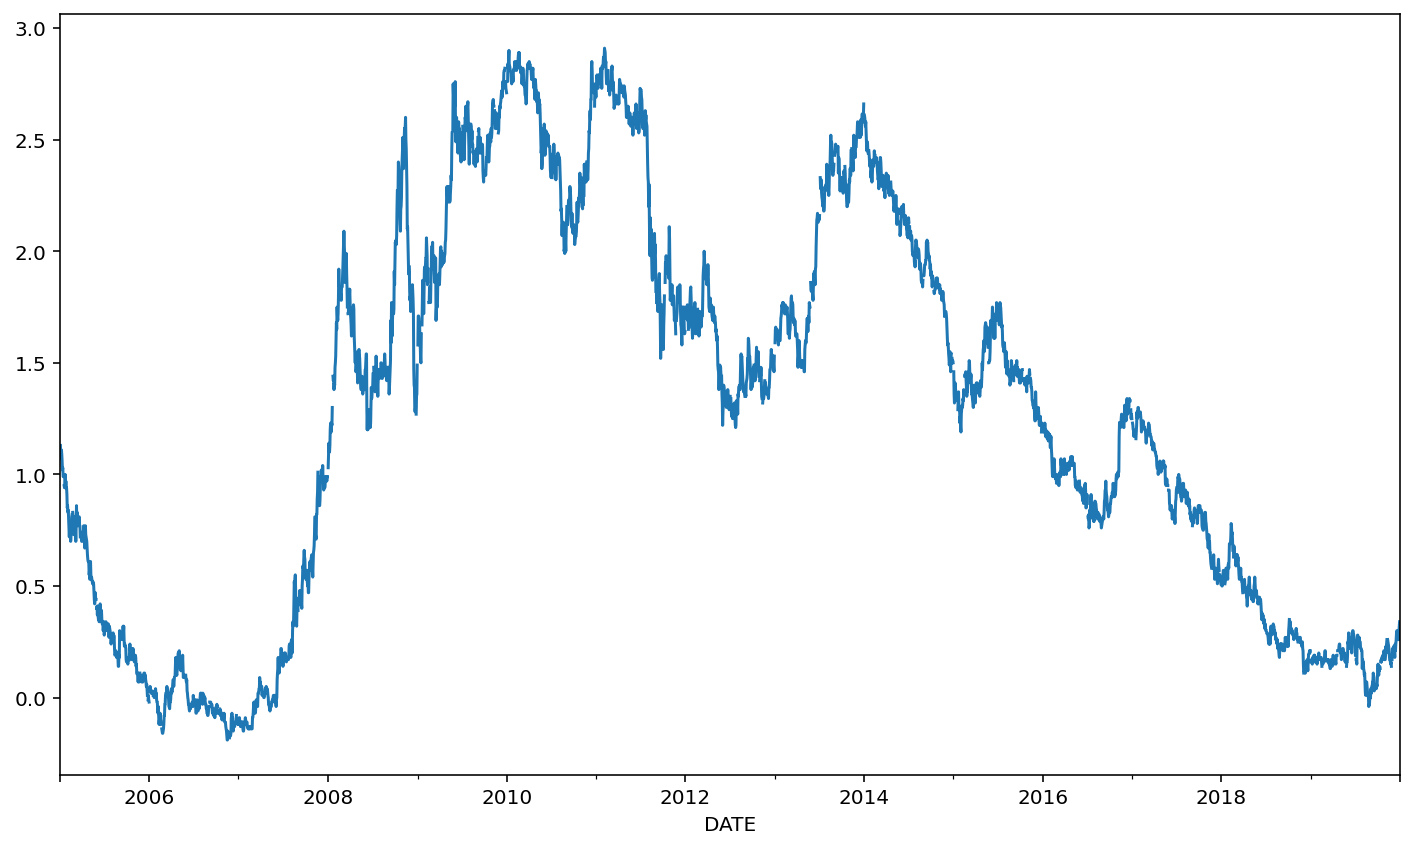

In [99]:
ts['Slope'] = ts['DGS10'] - ts['DGS2']
ts['Slope'].plot()

When this slope (the difference between the 10 year and 2 year) is negative, we refer to this as a yield curve inversion.

These inversion events are reasonably good predictors of recessions.

Let's test this idea.  Begin by getting a series of data about when recessions occur from [FRED](https://fred.stlouisfed.org/series/JHDUSRGDPBR).

In [101]:
recession = web.DataReader('JHDUSRGDPBR', 'fred', start, end)

recession.head()

,JHDUSRGDPBR
DATE,
2005-01-01,0.0
2005-04-01,0.0
2005-07-01,0.0
2005-10-01,0.0
2006-01-01,0.0


The data series `'JHDUSRGDPBR'` is a list of recessions.  The value will be 1 when there is a recession and 0 when there is not a recession.

Let's now merge the recession data.  Note that the recession data is observed once per quarter.  We should convert all data to a quarterly frequency before preceeding.

In [125]:
tsq = ts.to_period('Q')

tsq.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope
DATE,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13
2005Q1,2.05,2.33,2.63,2.82,3.20,3.72,4.02,4.29,4.91,0.012371,1.09
2005Q1,2.04,2.33,2.63,2.83,3.22,3.73,4.02,4.29,4.88,-0.006110,1.07
2005Q1,2.04,2.31,2.63,2.82,3.18,3.71,4.01,4.29,4.89,0.002049,1.11
2005Q1,2.03,2.32,2.63,2.82,3.20,3.73,4.03,4.29,4.88,-0.002045,1.09


In [111]:
recessionq = recession.to_period('Q')

recessionq.head()

,JHDUSRGDPBR
DATE,
2005Q1,0.0
2005Q2,0.0
2005Q3,0.0
2005Q4,0.0
2006Q1,0.0


Note that the term structure data has multiple observations for a given quarter.  Suppose that we only want to use the first observation.  That is, at the start of a quarter, what does the term structure look like?  We can remove duplicate index values to get rid of the observations that do not correspond to the first observation for each quarter using `.duplicated()`.

In [124]:
tsq = tsq[~tsq.index.duplicated(keep='first')] # <index>.duplicated(keep='first') marks all duplicates except the first as True

tsq.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope
DATE,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18
2006Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The observation at `'2006Q1'` is troubling.  Why is there missing data there?

In [127]:
ts.loc['2005-12-29':'2006-01-03']

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope
DATE,,,,,,,,,,,
2005-12-29,3.67,4.01,4.34,4.35,4.38,4.33,4.34,4.37,4.49,-0.004435,-0.01
2005-12-30,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,4.05,4.16,4.40,4.38,4.34,4.30,4.32,4.37,4.52,NaN,0.03


It's unclear why the first observation for the first quarter of 2006 is missing, but we don't want to lose that quarter of data simply because one date has missing data.  Let's fill in the data.  The method we'll use to do so is `'ffill'`, which stands for forward fill.  Pandas will take the most recent data (in this case `'2005-12-30'`) and use that to fill in the missing data (at `'2006-01-02'`).

In [128]:
ts = ts.fillna(method='ffill')

ts.loc['2005-12-29':'2006-01-03']

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope
DATE,,,,,,,,,,,
2005-12-29,3.67,4.01,4.34,4.35,4.38,4.33,4.34,4.37,4.49,-0.004435,-0.01
2005-12-30,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02
2006-01-02,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02
2006-01-03,4.05,4.16,4.40,4.38,4.34,4.30,4.32,4.37,4.52,0.004454,0.03


With that data problem fixed, we can go back to the quarterly data.  Let's re-make the quarterly information.

In [129]:
tsq = ts.to_period('Q')
tsq = tsq[~tsq.index.duplicated(keep='first')] # <index>.duplicated(keep='first') marks all duplicates except the first as True'

tsq.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope
DATE,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18
2006Q1,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02


Now we can merge the two quarterly DataFrames.

In [130]:
ts_recession = tsq.merge(recessionq, on='DATE')

ts_recession.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope,JHDUSRGDPBR
DATE,,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13,0.0
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71,0.0
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30,0.0
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18,0.0
2006Q1,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02,0.0


And finally, we can try to see if recessions are more likely when the slope is negative.  In order to say that yield curve inversions might predict recessions, we need to use data from before a recession begins.  For instance, does an inversion at quarter 3 of year $t$ imply that a recession is likely to begin at quarter 4 of year $t$?  We'll use `.shift()` to make a lagged copy of the `'Slope'` column.

In [131]:
ts_recession['Lagged Slope'] = ts_recession['Slope'].shift(1)

ts_recession.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope,JHDUSRGDPBR,Lagged Slope
DATE,,,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13,0.0,NaN
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71,0.0,1.13
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30,0.0,0.71
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18,0.0,0.30
2006Q1,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02,0.0,0.18


One last data-cleaning issue: `statsmodels` *hates* missing values.  It throws a fit and stops working when it sees them.  Notice that the first value of `'Lagged Slope'` is missing, because we can't observe a lag for the first data point.

To get rid of it, we use `.dropna()` to find all observations where the data is not missing.

In [135]:
ts_recession = ts_recession.dropna()

ts_recession.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope,JHDUSRGDPBR,Lagged Slope,constant
DATE,,,,,,,,,,,,,,
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71,0.0,1.13,1
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30,0.0,0.71,1
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18,0.0,0.30,1
2006Q1,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02,0.0,0.18,1
2006Q2,4.66,4.67,4.86,4.86,4.86,4.85,4.86,4.88,4.90,0.000000,0.02,0.0,-0.02,1


Now, we can use `statsmodels` to run a logistic regression (since the y variable, `'JHDUSRGDPBR'` is only ever 0 or 1).

In [138]:
import statsmodels.api as sm

ts_recession['constant'] = 1
model = sm.Logit(ts_recession['JHDUSRGDPBR'], ts_recession[['constant','Lagged Slope']]).fit()

print( model.summary() )

Optimization terminated successfully.
         Current function value: 0.391700
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            JHDUSRGDPBR   No. Observations:                   59
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:                 0.01306
Time:                        23:43:47   Log-Likelihood:                -23.110
converged:                       True   LL-Null:                       -23.416
Covariance Type:            nonrobust   LLR p-value:                    0.4342
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant        -1.4408      0.623     -2.314      0.021      -2.661      -0.220
Lagged Slope    -0.3453

Negative $\beta$ coefficients in a Logit model mean that the covariate (the right hand side variable) corresponding to that $\beta$ coefficient are negatively predictive of the event.  The "event" is an instance of y=1.  So, what we see here is that a higher slope is negatively predictive of a recession.

If you load a much longer dataset, you can see a similar pattern over time.

The question is, why does this work?  What's the connection between the yield curve and recessions?

Let's turn our attention to the *expectations hypothesis*, which is covered in earlier courses.  Define $y_t^{(i)}$ to be the one period interest rate at time $t$ for a Treasury security with $i$ periods to maturity.  We thus have

$$
\Big(1+y_t^{(2)}\Big)^2 = \Big(1+y_t^{(1)}\Big)\text{E}_t\Big[\Big(1+y_{t+1}^{(1)}\Big)\Big]
$$

That is, the cumulative return for holding a two-year Treasury to maturity should be the same return as holding a one-year Treasury to maturity and then holding another (future) one-year Treasury to maturity after that.  At year $t$, we don't know what the one-year Treasury will be at in year $t+1$.  Thus, we say that the *expected* value of it is $\text{E}_t\Big[\Big(1+y_{t+1}^{(1)}\Big)\Big]$, where $\text{E}$ stands for expected value.

Let's define the one-year forward rate as

$$
\Big(1+f_{t}^{(1)}\Big) = \frac{\Big(1+y_t^{(2)}\Big)^2}{\Big(1+y_t^{(1)}\Big)}
$$

The value for $f_{t}^{(1)}$ is something that we can calculate given other data at time $t$.  The Expectations Hypothesis says that this value should be a good estimate for the expected future spot rate, i.e.:

$$
f_{t}^{(1)} = \text{E}_t\Big[1+y_{t+1}^{(1)}\Big]
$$

Compute the forward rate below.

In [146]:
tsq['1Y Forward'] = (1+tsq['DGS2'])**2/(1+tsq['DGS1']) - 1

tsq.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope,1Y Forward
DATE,,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13,3.435356
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71,4.198733
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30,4.023858
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18,4.332829
2006Q1,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02,4.440167


Now, we shift the data ahead by 4 periods so we get a one year lag.

In [147]:
tsq['Last Year 1Y Forward'] = tsq['1Y Forward'].shift(4)

tsq.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GDS30 growth,Slope,1Y Forward,Last Year 1Y Forward
DATE,,,,,,,,,,,,,
2005Q1,1.99,2.32,2.63,2.79,3.10,3.64,3.94,4.23,4.85,NaN,1.13,3.435356,NaN
2005Q2,2.66,2.80,3.13,3.34,3.75,4.13,4.29,4.46,4.72,-0.008403,0.71,4.198733,NaN
2005Q3,3.02,3.17,3.38,3.51,3.76,3.84,3.92,4.06,4.28,0.021480,0.30,4.023858,NaN
2005Q4,3.22,3.61,4.02,4.09,4.21,4.25,4.31,4.39,4.58,0.011038,0.18,4.332829,NaN
2006Q1,4.01,4.08,4.37,4.38,4.41,4.35,4.36,4.39,4.51,0.004454,-0.02,4.440167,3.435356


The Expectations Hypothesis says that this one year old forward rate should be the same, on average, as what the spot rate is.  We can test this with linear regression.

In [152]:
tsq2 = tsq.dropna().copy() # since some missinge lagged

tsq2['constant'] = 1 # note, we'll use a constant even though, theoretically, there alpha should be zero in this relationship

eh = sm.OLS(tsq2['DGS1'], tsq2[['constant','Last Year 1Y Forward']]).fit()

print(eh.summary())

                            OLS Regression Results                            
Dep. Variable:                   DGS1   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     118.1
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.34e-15
Time:                        00:20:08   Log-Likelihood:                -73.610
No. Observations:                  56   AIC:                             151.2
Df Residuals:                      54   BIC:                             155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                -0.4118 

The $\beta$ coefficient is close to 1, which is expected given the predicted relationship.

What can the Expectations Hypothesis tell us?  Well, if there is a yield curve inversion, it's because the market is expecting interest rates to be lower in the future than they are today.  Why would the market expect that?  Well, during recessions, the Fed will lower rates to stimulate growth.  Thus, it's pretty natural, when you think about it, to expect an inversion to occur before a recession.  All it means is that bond traders are, on average, expecting a recession to occur.  A more pertinent question is *why* bond traders see a recession coming.  We'd need more data to answer that question.

For our final bit of work in this section, let's turn our attention to a different set of data that may be informative about future economic conditions: the [Senior Loan Office Opinion Survey ](https://www.federalreserve.gov/data/sloos.htm) published by the Federal Reserve.  We can get the data from FRED via `pandas_datareader`.

<AxesSubplot:xlabel='DATE'>

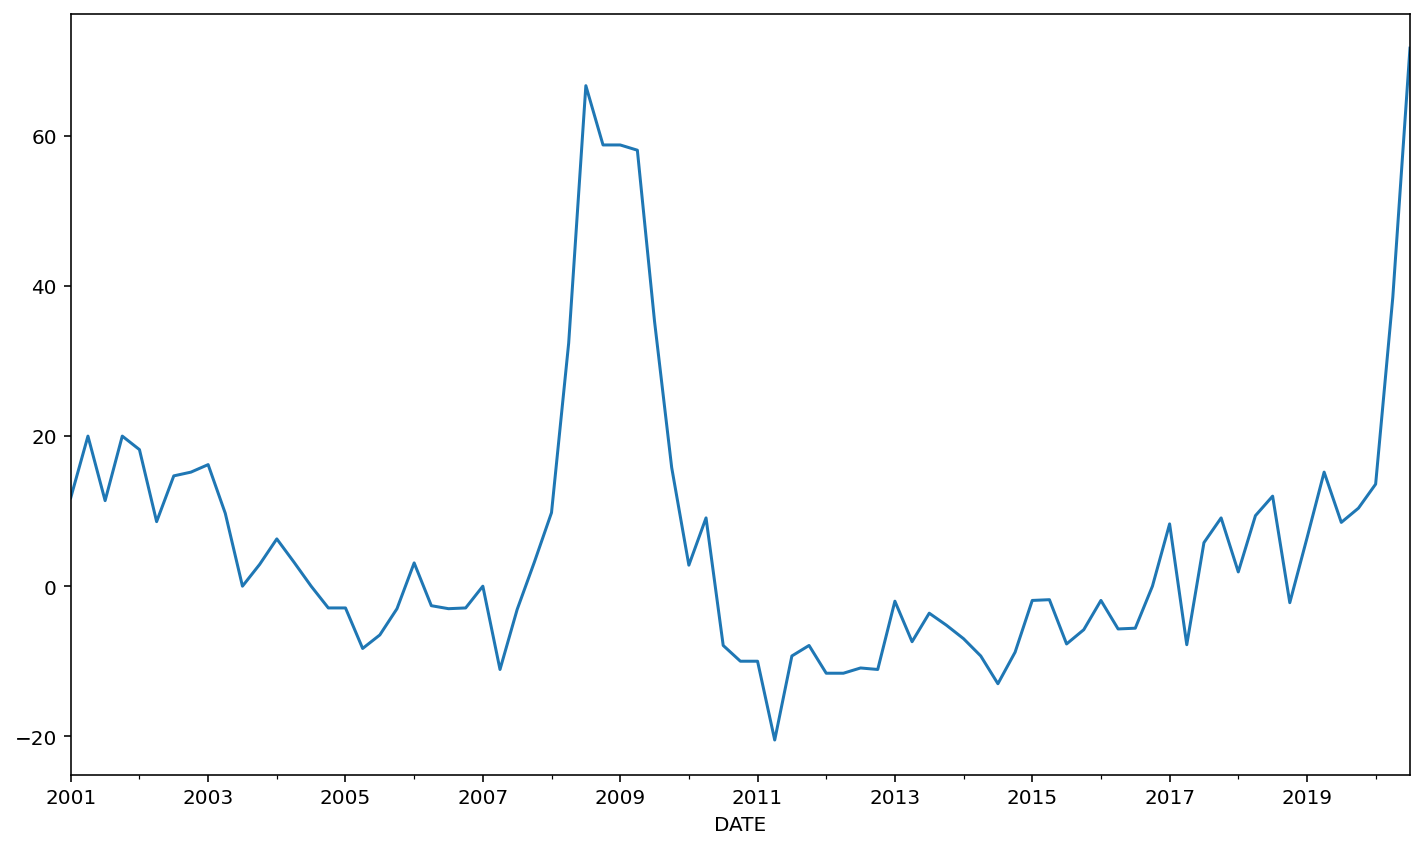

In [153]:
first = datetime(2001,1,1)
last = datetime(2020,9,30)

credit_cards = web.DataReader('DRTSCLCC', 'fred', first, last)
credit_cards['DRTSCLCC'].plot()

<AxesSubplot:xlabel='DATE'>

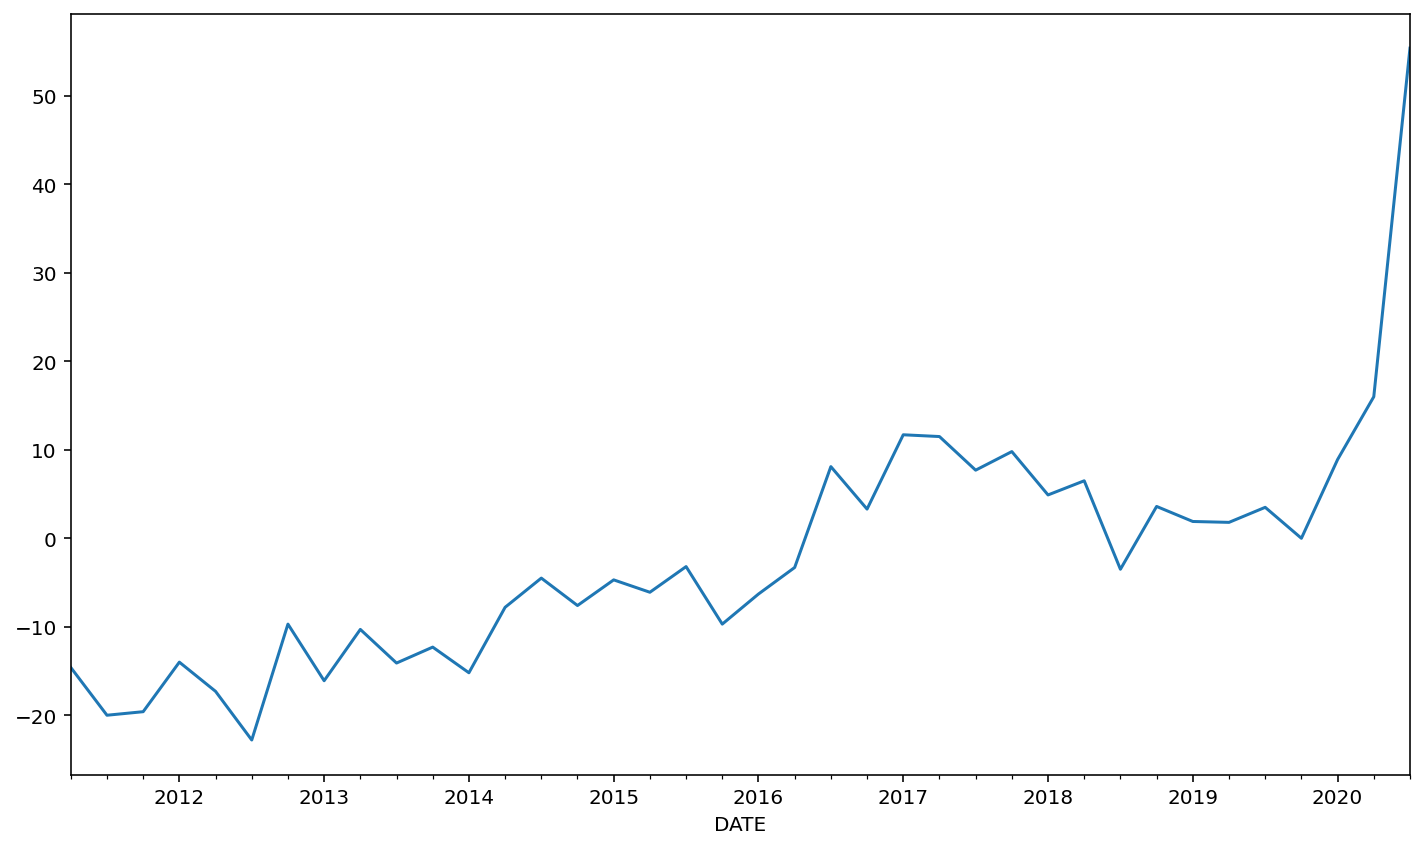

In [154]:
auto_loans = web.DataReader('STDSAUTO', 'fred', first, last)
auto_loans['STDSAUTO'].plot()

<AxesSubplot:xlabel='DATE'>

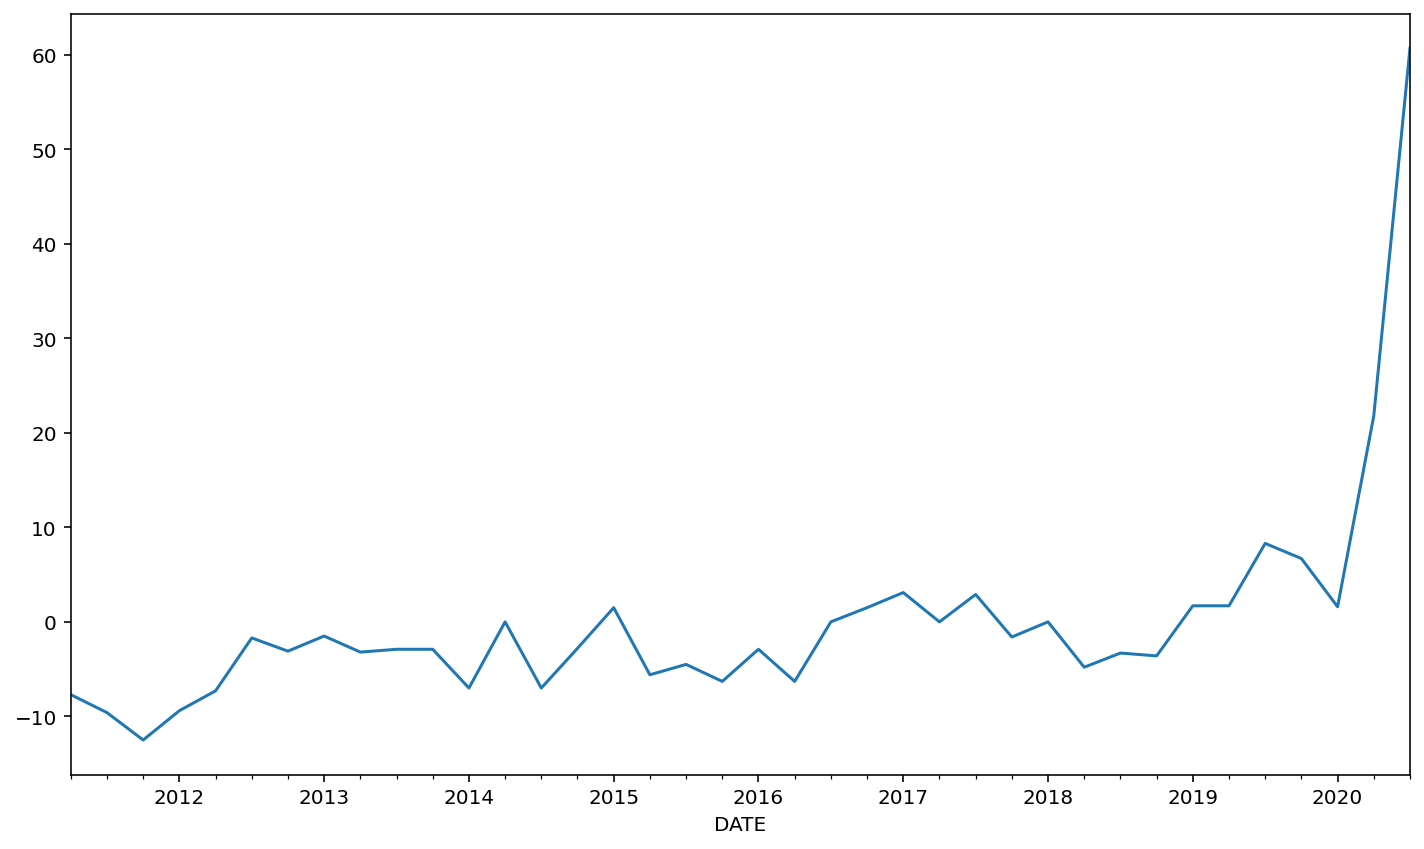

In [156]:
loans_except_CCandAuto = web.DataReader('STDSOTHCONS', 'fred', first, last)
loans_except_CCandAuto['STDSOTHCONS'].plot()

<AxesSubplot:xlabel='DATE'>

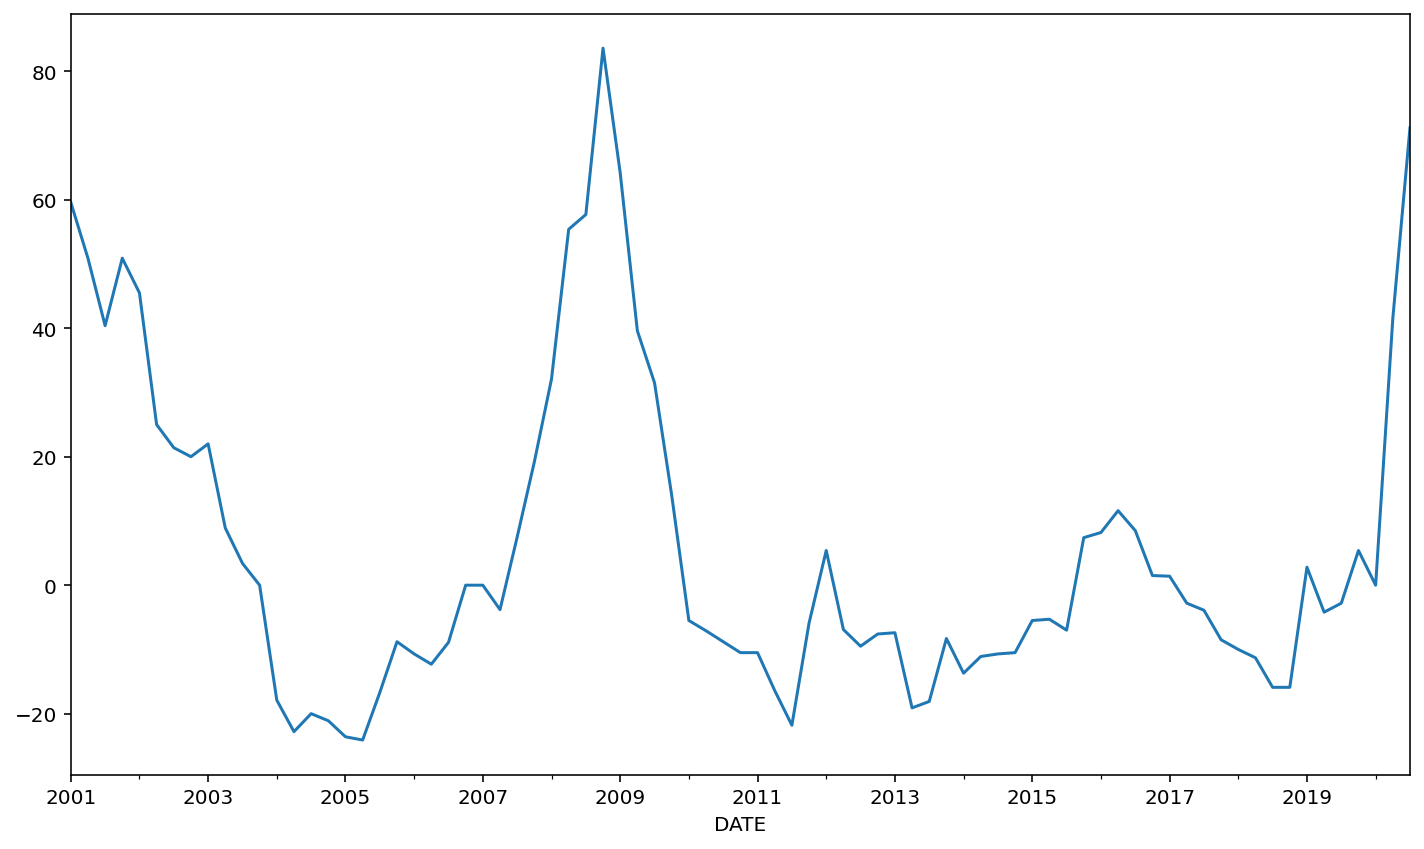

In [157]:
large_firms = web.DataReader('DRTSCILM', 'fred', first, last)
large_firms['DRTSCILM'].plot()

<AxesSubplot:xlabel='DATE'>

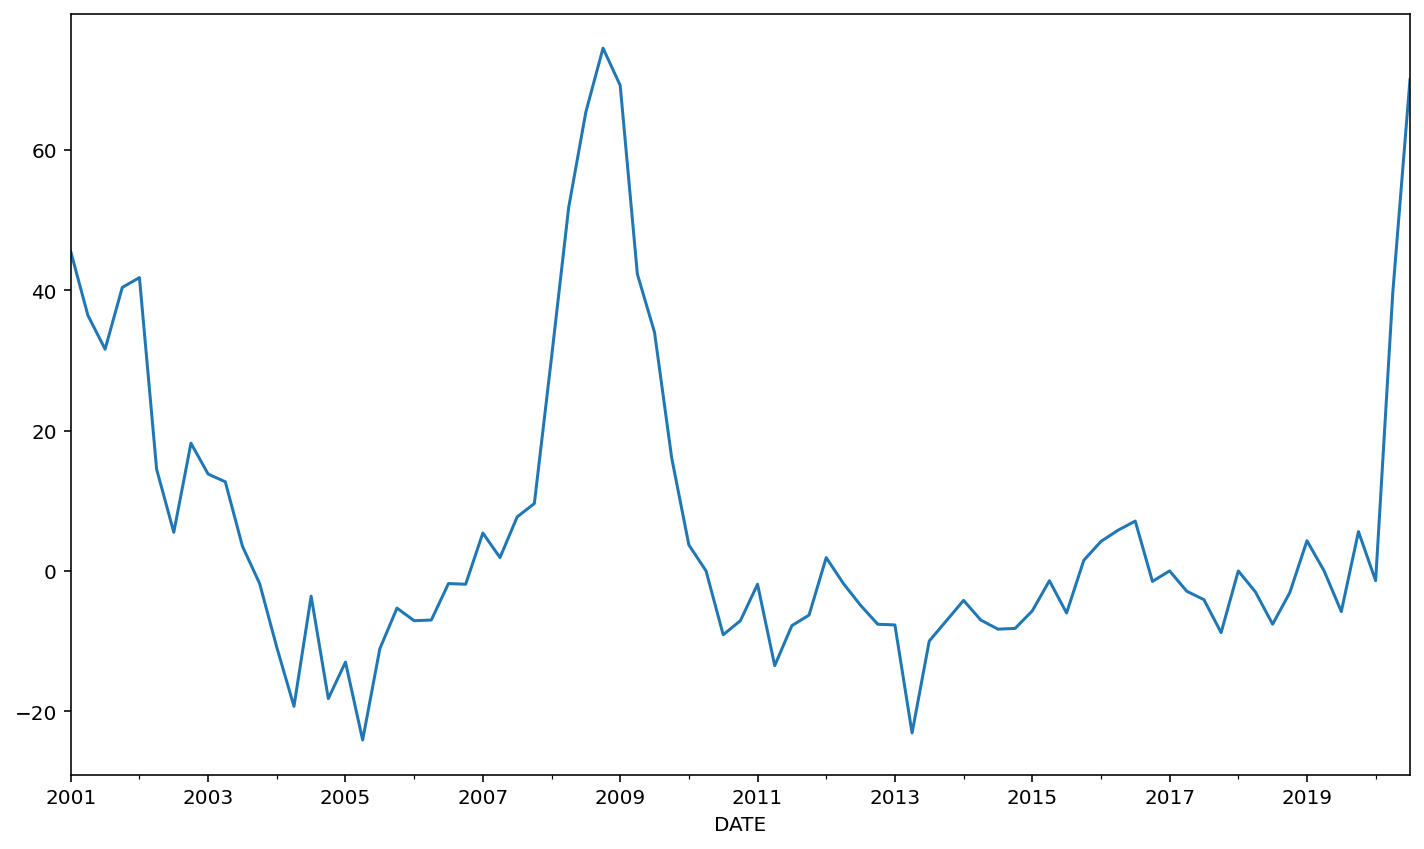

In [158]:
small_firms = web.DataReader('DRTSCIS', 'fred', first, last)
small_firms['DRTSCIS'].plot()